# Classification

## Logistic Regression 

In this lab we will explore logistic regression which is a well known method for classification problems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

In [2]:
np.random.seed = 72

### Load data

We will start with the hear disease data-set. Here's a description of the attributes in the data-set:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. target: 1: presence 2: absence of a heart disease

In [3]:
# data-set: heart.csv
df = pd.read_csv("COPY_THE_URL_FROM_GITHUB")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,M,D,145,233,yes,A,150,no,1
1,37,M,C,130,250,no,B,187,no,1
2,41,F,B,130,204,no,A,172,no,1
3,56,M,B,120,236,no,B,178,no,1
4,57,F,A,120,354,no,B,163,yes,1


In [4]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Simple Logistic Regression

let's start with only 2 features: age and maximum heart rate achieved

In [5]:
X = np.array(df[["age", "thalach"]])
y = np.array(df["target"])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#### very important 

When you do standardisation (or any other modification) to the training data, you have to apply the same modifications to the test data as well. Otherwise your test accuracy would be non-sense.

Here we apply the same standardisation to test data, which means that we normalize the test data with mean and standard deviation from the train data.

In [8]:
standardize = StandardScaler()
standardize.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train = standardize.transform(X_train)
X_test = standardize.transform(X_test)

In [10]:
# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [11]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
# best regulariser parameter
LR.C_

array([0.35938137])

In [13]:
# train accuracy
LR.score(X_train,y_train)

0.6652892561983471

In [14]:
# test accuracy
LR.score(X_test, y_test)

0.7377049180327869

### decision boundary

As we used only two features for classification, we can observe the linear decision boundary made by loistic regression in a 2D plot. You can also observe the mis-clasified training points in this plot.

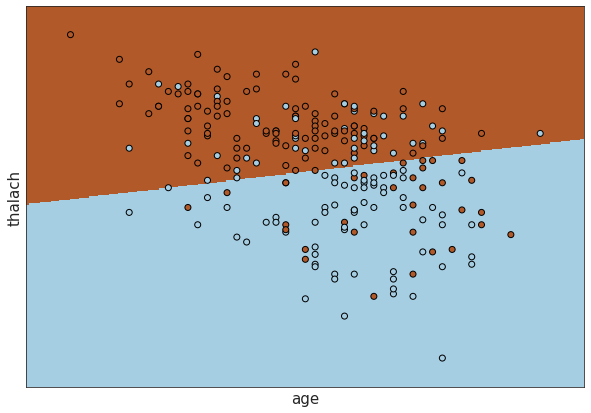

In [15]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('age', fontsize=15)
plt.ylabel('thalach', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Now let's try more numerical features and see if the accuracy imporoves

In [28]:
X = df[["age", "thalach", "trestbps", "chol"]]
y = df["target"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [30]:
standardize = StandardScaler()
standardize.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train = standardize.transform(X_train)
X_test = standardize.transform(X_test)

In [32]:
LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [33]:
# best regulariser parameter
LR.C_

array([2.7825594])

In [34]:
# train accuracy
LR.score(X_train,y_train)

0.7024793388429752

In [35]:
# test accuracy
LR.score(X_test, y_test)

0.7704918032786885

### Make use of categorical features by encoding them

As we can see we have a couple of categorical features, but we cannot directly use these features for classification. so we need to encode them to numerical values.

#### one-hot encoding

In [36]:
one_hot = OneHotEncoder(categories="auto")

In [37]:
cat_to_onehot = one_hot.fit_transform(df[["sex", "cp", "fbs", "restecg"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)

In [38]:
cat_to_onehot

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
299,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
X = pd.concat((X, cat_to_onehot), axis=1)
X

,age,thalach,trestbps,chol,0,1,2,3,4,5,6,7,8,9,10
0,63,150,145,233,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,37,187,130,250,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,41,172,130,204,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,56,178,120,236,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,57,163,120,354,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,123,140,241,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
299,45,132,110,264,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
300,68,141,144,193,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,57,115,130,131,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [42]:
# we standardize only the numerical features
standardize = StandardScaler()
standardize.fit(X_train.iloc[:, :4], y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train.loc[:, :4] = standardize.transform(X_train.iloc[:, :4])
X_test.loc[:, :4] = standardize.transform(X_test.iloc[:, :4])

/home/ahmad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/ahmad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [50]:
# best regulariser parameter
LR.C_

array([0.35938137])

In [51]:
# train accuracy
LR.score(X_train, y_train)

0.7892561983471075

In [52]:
# test accuracy
LR.score(X_test, y_test)

0.7868852459016393

#### Label encoding
Another possible option to convert categoricals is label encoding. This is useful when a features has many categorical values.

In [53]:
le = LabelEncoder()
cat_to_label = le.fit_transform(df["cp"])

In [54]:
cat_to_label

array([3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0, 2,
       0, 2, 3, 1, 2, 2, 2, 2, 1, 0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 3, 0, 2, 1, 3, 1, 2, 0,
       2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 3, 3, 1, 2, 2, 2, 3, 0, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 3, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 3, 2, 2, 0, 0, 3, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0,

In [55]:
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

### Recall
Up to know we were computing the precision score, i.e. what percentage of the cases we have classified correctly. But usually in application all the target classes are not of same importance. So it is important to also see how does our model perform in predicting a specific class correctly.

For example, here it is important for us to not miss the cases which have actually heart disease.

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(y_test, LR.predict(X_test), pos_label=1)

0.7105263157894737

### Multi class Regression

Let's now consider a classification problem with more than 2 target classes. For this we will use the iris data-set which has 3 target classes.

In [58]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [60]:
log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [61]:
log_reg.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [62]:
log_reg.C_

array([0.35938137, 0.35938137, 0.35938137])

In [63]:
log_reg.score(X_train, y_train)

0.7916666666666666

In [64]:
log_reg.score(X_test, y_test)

0.9333333333333333

#### Decision boundaries

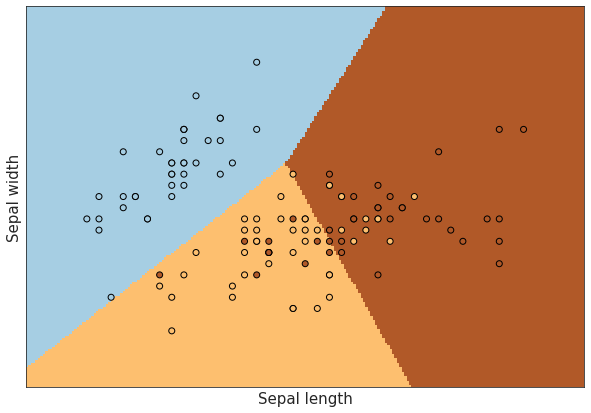

In [65]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Confusion matrix

Compute the confusion matrix to evaluate the training accuracy of this classification.

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_reg.predict(X_train))

array([[37,  0,  0],
       [ 0, 30, 12],
       [ 0, 13, 28]])

Confusion matrix, without normalization


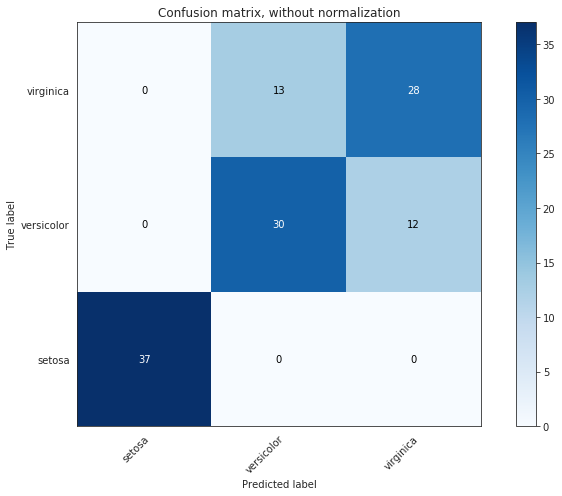

In [67]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_train, log_reg.predict(X_train), classes=iris.target_names,
                      title='Confusion matrix, without normalization')
